In [2]:
import random
random.randrange(200, 400)

242

In [3]:
import pandas as pd
import numpy as np

np.random.seed(42)
data = {
    'Day': range(1, 22),
    "Sales": [np.random.randint(200, 400) for i in range(1, 22)]
}
df = pd.DataFrame(data)

ts = df["Sales"].values
mu = np.mean(ts)


In [4]:
# Possible epsilon values excluding 0
possible_eps = [-5, -4, -3, -2, -1, 1, 2, 3, 3, 5]

# Generate epsilon of same length as ts
epsilon = np.random.choice(possible_eps, len(ts))
epsilon

array([ 1, -4, -1, -5,  5,  1,  3, -5,  5, -3,  2, -2,  3, -3, -1, -3,  2,
       -1,  3,  2, -4])

In [5]:
# defining the MA(1) process
theta = 0.5
ma1_series = [mu + epsilon[0]]  # first value, no previous epsilon
ma1_series

[298.3333333333333]

In [6]:
for t in range(1, len(ts)):
    ma1_series.append(mu + epsilon[t] + theta * epsilon[t - 1])
ma1_series

[298.3333333333333,
 293.8333333333333,
 294.3333333333333,
 291.8333333333333,
 299.8333333333333,
 300.8333333333333,
 300.8333333333333,
 293.8333333333333,
 299.8333333333333,
 296.8333333333333,
 297.8333333333333,
 296.3333333333333,
 299.3333333333333,
 295.8333333333333,
 294.8333333333333,
 293.8333333333333,
 297.8333333333333,
 297.3333333333333,
 299.8333333333333,
 300.8333333333333,
 294.3333333333333]

In [7]:
epsilon_next = np.random.choice(possible_eps, 1)

forecast_next = mu + theta * epsilon[-1] + epsilon_next
print("Forecast for next day:", forecast_next)

Forecast for next day: [293.33333333]


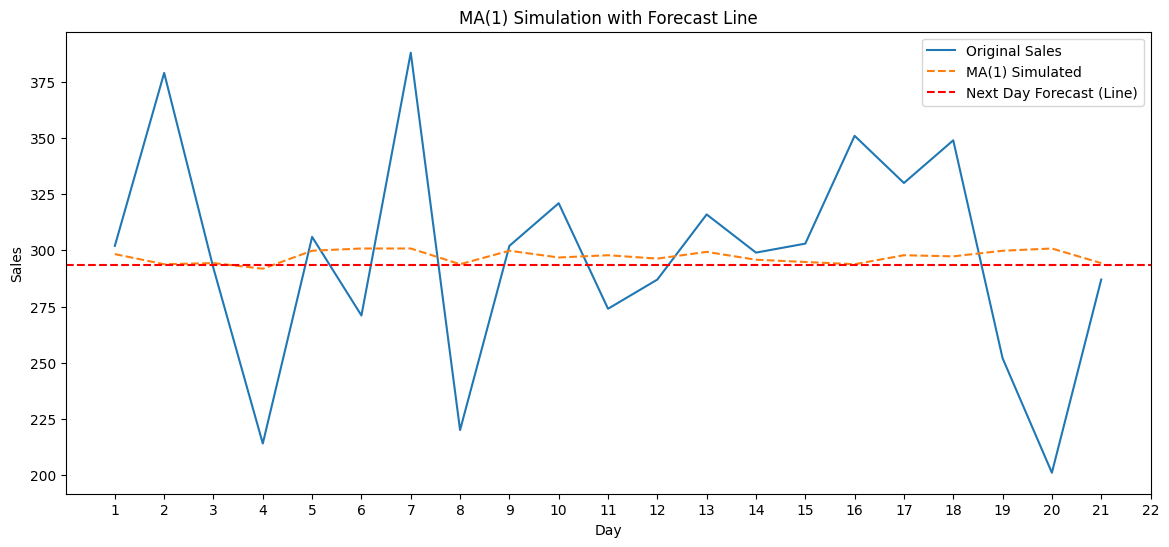

In [8]:
import matplotlib.pyplot as plt

# Plot 1: Next day forecast as a line
plt.figure(figsize=(14, 6))
plt.plot(df["Day"], ts, label="Original Sales")
plt.plot(df["Day"], ma1_series, linestyle="--", label="MA(1) Simulated")
plt.axhline(
    y=forecast_next, color="red", linestyle="--", label="Next Day Forecast (Line)"
)
plt.xticks(list(df["Day"]) + [22])  # include next day on x-axis
plt.xlabel("Day")
plt.ylabel("Sales")
plt.title("MA(1) Simulation with Forecast Line")
plt.legend()
plt.show()



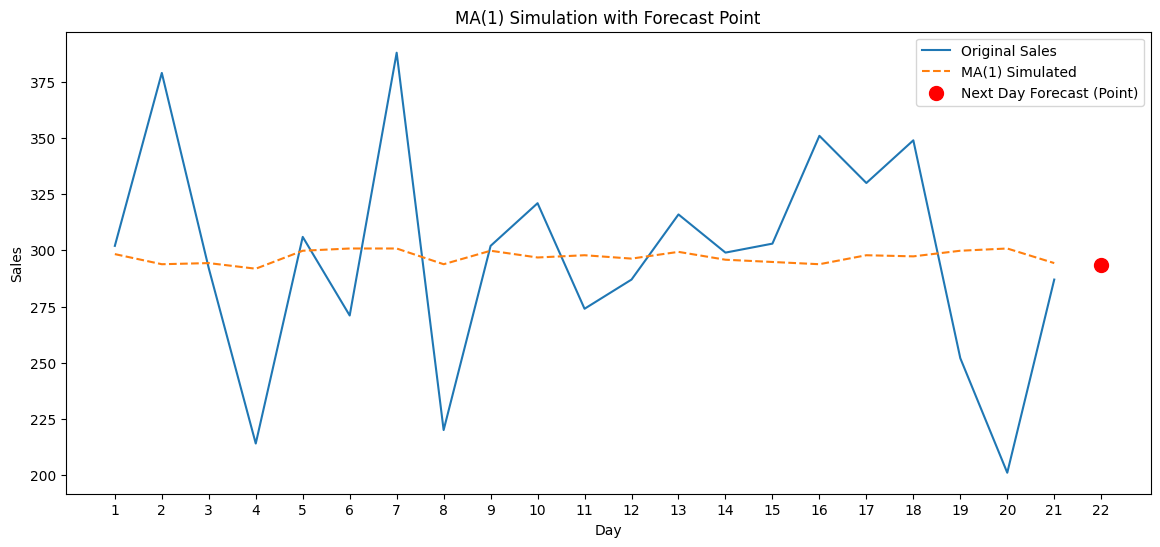

In [9]:
# Plot 2: Next day forecast as a point
plt.figure(figsize=(14, 6))
plt.plot(df["Day"], ts, label="Original Sales")
plt.plot(df["Day"], ma1_series, linestyle="--", label="MA(1) Simulated")
plt.scatter(22, forecast_next, color="red", s=100, label="Next Day Forecast (Point)")
plt.xticks(list(df["Day"]) + [22])
plt.xlabel("Day")
plt.ylabel("Sales")
plt.title("MA(1) Simulation with Forecast Point")
plt.legend()
plt.show()